In [74]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# Task 1

Check consistency of results with Stokes law. The mass of the silica particles is $m = \rho \frac{4\pi (D/2)^3}{3} \approx 3.013*10^{-11}$ g.

# Task 2

Chose our units to be $L=1 \mu m$, $T = 1 \mu s $, $M=1$ particle mass. This gives energy the dimensions 

$$E = ML^2/T^2 = 3.013*10^{-14} kg \cdot \frac{(10^{-6}m)^2}{(10^{-6}s)^2} = 3.013*10^{-14} J \rightarrow 1 J = 3.319*10^{13} E_{unit}$$

We thus have the values of parameters:

$$ \tau = 48.5 \rm T, 147.3 \rm T$$
$$ x(0) = 0.1 \rm L $$
$$ v(0) = 2.0 \rm \mu m/ms = 2.0\cdot 10^{-3} \rm L/T $$
$$ f_0 = 3 kHz = 3000 \cdot 1/s = 3000 \cdot 1/(10^6 T) = 3\cdot 10^{-3} \rm 1/T  $$
$$ Temp = 297 K$$
$$ k_BT = 1.381 \cdot 10^{-23} * 297 J \hspace{15px} 1.381 \cdot 10^{-23} \cdot 3.013*10^{13} E/T = 1.36 \cdot 10^{-7} $$

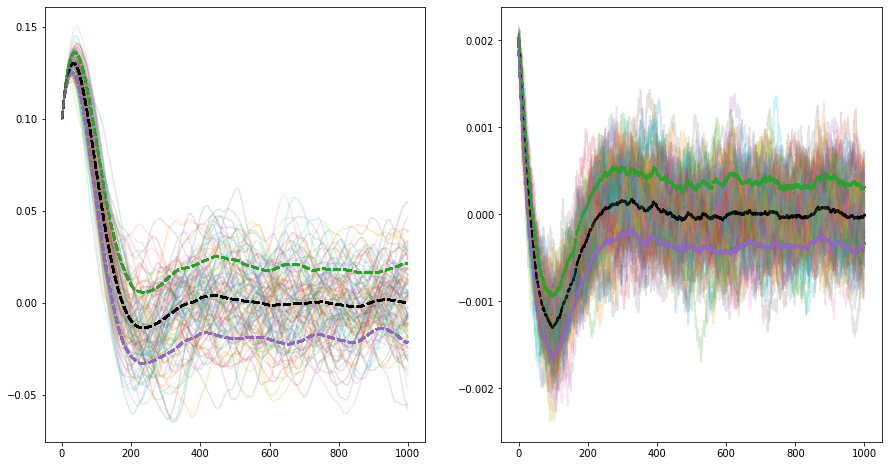

In [8]:
# Load data
pos = np.loadtxt("pos.dat")
vel = np.loadtxt("vel.dat")

fig, ax = plt.subplots(1,2,figsize=(15,8))

meanPos = np.mean(pos[:,1:], axis=1)
meanVel = np.mean(vel[:,1:], axis=1)
varPos = np.var(pos[:,1:], axis=1)
varVel = np.var(vel[:,1:], axis=1)

nwalkers = len(pos[0,1:])

for i in range(1,nwalkers+1):
    ax[0].plot(pos[:,0], pos[:,i], alpha=0.2)
    ax[0].plot(pos[:,0], meanPos, color='k', linestyle='--', linewidth=2, alpha=1)
    ax[0].plot(pos[:,0], meanPos+np.sqrt(varPos), color='C2', linestyle='--', linewidth=2, alpha=0.7)
    ax[0].plot(pos[:,0], meanPos-np.sqrt(varPos), color='C4', linestyle='--', linewidth=2, alpha=0.7)
    ax[0].grid()
    
    
    ax[1].plot(vel[:,0], vel[:,i], alpha=0.2)
    ax[1].plot(vel[:,0], meanVel, color='k', linestyle='--', linewidth=2, alpha=0.3)
    ax[1].plot(vel[:,0], meanVel+np.sqrt(varVel), color='C2', linestyle='--', linewidth=2, alpha=0.7)
    ax[1].plot(vel[:,0], meanVel-np.sqrt(varVel), color='C4', linestyle='--', linewidth=2, alpha=0.7)
    ax[1].grid()

# Task 3 - Generate a lot of trajectories, and plot histograms over vel for a few times

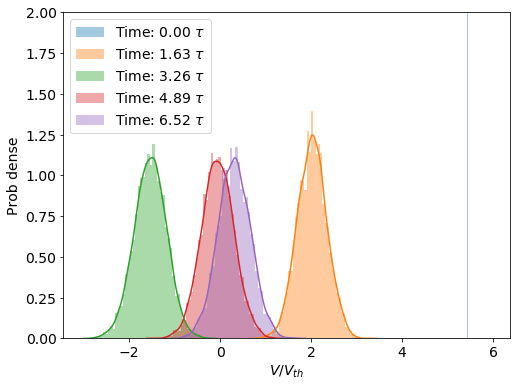

In [88]:
# Plot histogram for 5 times: 1/5, 2/5, 3/5 etc
vel = np.loadtxt("vel_many.dat")
vth = 0.00036878
tau=147.3


fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(vel[:,0])):
    sns.distplot(vel[i, 1:]/vth, hist=True, label=rf'Time: {vel[i,0]/tau:.2f} $\tau$')

ax.set_ylim(0,2)
ax.legend(loc='upper left')
ax.set_xlabel(r'$V/V_{th}$')
ax.set_ylabel('Prob dense')
plt.savefig(f'vel_tau={tau:.1f}.png')

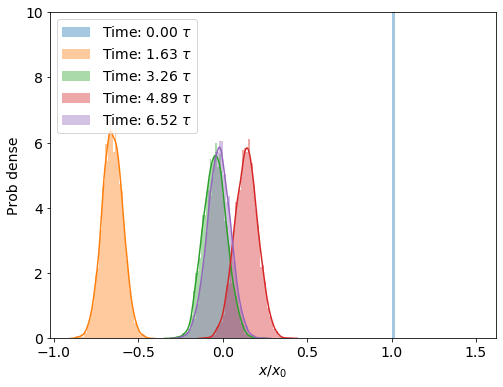

In [90]:
# Plot histogram for 5 times: 1/5, 2/5, 3/5 etc
pos = np.loadtxt("pos_many.dat")
vth = 0.00036878
tau=147.3


fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(pos[:,0])):
    sns.distplot(pos[i, 1:]/pos[0,1], hist=True, label=rf'Time: {pos[i,0]/tau:.2f} $\tau$')

ax.set_ylim(0,10)
ax.legend(loc='upper left')
ax.set_xlabel(r'$x/x_0$')
ax.set_ylabel('Prob dense')
plt.savefig(f'pos_tau={tau:.1f}.png')